<a href="https://colab.research.google.com/github/SayuruA/Pattern_Recognition/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy() # Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()
# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])
# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['species', 'island', 'sex','class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [2]:
df.describe()
# List the different values the island feature can take
island = set()
j = 0;
for i in df['island']:
  island.add(i)
print(island)

{'Torgersen', 'Biscoe', 'Dream'}


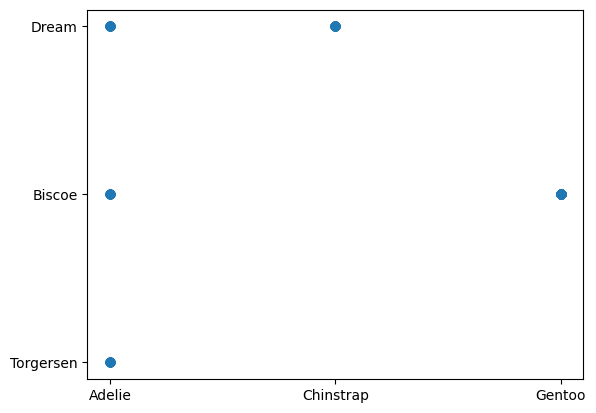

island     Biscoe  Dream  Torgersen
species                            
Adelie         44     55         47
Chinstrap       0     68          0
Gentoo        119      0          0


In [3]:
import matplotlib.pyplot as plt

X__ = df[['species', 'island']].copy()
#plot X__ using a scatter plot
plt.scatter(X__['species'], X__['island'])
plt.show()
table = pd.crosstab(df['species'],df['island'])
print(table)

Explanation:

1.   After dropping null values of the *Penguins* data set (*df* ) we have only taken the *rows* belonging to species *Adelie* and *Chinstrap* (*df_filtered* ).
2.   We have encoded species' names with a label using *Label Encoding* and saved that as a new column in *df_filtered* (*class_encoded*).
3.   *df_filtered*  is broken into *X* (after removing categorical features) and *y* (*Features and Targets*).



In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the logistic regression model. Here we are using sagasolver to learn weights.
logreg = LogisticRegression(solver='saga',max_iter=1000000,tol = 1e-6)
#logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 0.94267553 -0.23814936 -0.13739892 -0.00292343]] [-0.01238674]


Expalnation:

1.   First, we divide the data set into *train* and *test* splits.
2.   Use the *SAGA* solver as the logistic regression technique.
3. Without setting *max_iter* and *tol* to different values *SAGA* performs very poorly (default values of these parameters are: 100, 1e-4).
4. *fit*  method finds the model from the *test* set.
5. *predict* is used to get model predictions for any data point.
6. *accuracy* is measured using the *test* set and the formula is,




> Accuracy = (Number of Correct Predictions) / (Total Number of Samples)










Note 1: **SAGA**
* For large data sets of logisitic regression and linear classifiers.
 Supports *L1* and *L2* regularizations.
* *SAGA* performance may depend on *preprocessing,
regularization, class imbalance, solver hyperparameters*.
* *SAGA* can be very sensitive to unscaled data.

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the logistic regression model. Here we are using liblinear to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.45422752 -0.93943994 -0.16571368 -0.00398663]] [-0.04793176]


Note: **LibLinear**

*   For small to medium size data sets.
*   Best for binary classifications.
*   Support *L1* and *L2* regularization.





In [ ]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [ ]:
X.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,214.000000,214.000000,214.000000,214.000000
mean,42.004673,18.370561,191.920561,3714.719626
std,5.491545,1.191134,7.216846,435.667063
min,32.100000,15.500000,172.000000,2700.000000
25%,37.800000,17.500000,187.000000,3400.000000
50%,40.600000,18.400000,191.000000,3700.000000
75%,46.000000,19.100000,196.000000,3993.750000
max,58.000000,21.500000,212.000000,4800.000000


In [ ]:
import pandas as pd

# Assuming X is your DataFrame with features
X_manual_scaled = X.copy()  # Create a copy to store the scaled values

# Calculate the mean and standard deviation for each feature
means = X.mean()
stds = X.std()

# Apply standard scaling manually
for column in X.columns:
    X_manual_scaled[column] = (X[column] - means[column]) / stds[column]

# Display the scaled DataFrame
print(X_manual_scaled)

# Verify the mean and standard deviation of the scaled data
print("Mean of manually scaled data:", X_manual_scaled.mean())
print("Standard deviation of manually scaled data:", X_manual_scaled.std())


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0         -0.528935       0.276576          -1.513204     0.080980
1         -0.456096      -0.814821          -0.820381     0.195747
2         -0.310418      -0.311099           0.426702    -1.066685
4         -0.965971       0.780298           0.149572    -0.607619
5         -0.492516       1.871694          -0.266122    -0.148553
..              ...            ...                ...          ...
215        2.512103       1.200066           2.089478     0.654813
216        0.272296      -0.227145           1.396654    -0.722386
217        1.383095      -0.143192           0.149572     0.138363
218        1.601612       0.528437           2.505172     0.884346
219        1.492354       0.276576           0.842396     0.138363

[214 rows x 4 columns]
Mean of manually scaled data: bill_length_mm      -5.312469e-16
bill_depth_mm       -1.701650e-15
flipper_length_mm   -8.300733e-16
body_mass_g          1.660147e-17
dtype:

In [1]:

from sklearn.preprocessing import StandardScaler
# create a scaler object
scaler = StandardScaler()
# fit and transform the data
X_scaled = scaler.fit_transform(X)
# convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

NameError: name 'X' is not defined

In [ ]:
X_scaled.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.530176,0.277225,-1.516752,0.081170
1,-0.457166,-0.816731,-0.822304,0.196206
2,-0.311146,-0.311829,0.427702,-1.069186
3,-0.968236,0.782127,0.149923,-0.609044
4,-0.493671,1.876083,-0.266746,-0.148901


In [ ]:
X_scaled.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-5.976528e-16,-1.709951e-15,-8.964792e-16,2.905257e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-1.807851e+00,-2.415590e+00,-2.766758e+00,-2.334578e+00
25%,-7.674582e-01,-7.325807e-01,-6.834146e-01,-7.240794e-01
50%,-2.563880e-01,2.477326e-02,-1.278563e-01,-3.386563e-02
75%,7.292474e-01,6.138264e-01,5.665916e-01,6.419687e-01
max,2.919548e+00,2.633437e+00,2.788825e+00,2.496918e+00


Mean of scaled data: bill_length_mm      -5.976528e-16
bill_depth_mm       -1.709951e-15
flipper_length_mm   -8.964792e-16
body_mass_g          2.905257e-17
dtype: float64
Standard deviation of scaled data: bill_length_mm       1.002345
bill_depth_mm        1.002345
flipper_length_mm    1.002345
body_mass_g          1.002345
dtype: float64


In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_manual_scaled, y, test_size=0.2, random_state=42)

#Train the logistic regression model. Here we are using sagasolver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)
# Predict on the testing data
y_pred = logreg.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.9767441860465116
[[ 3.94405031 -0.82781859  0.19669713 -0.73586904]] [-1.79972929]


In [ ]:
import numpy as np
w = np.array([-5.9, 0.06, 1.5]).reshape(3,1)
x = np.array([1, 50, 3.6]).reshape(3,1)
w.T.dot(x)
y_=np.exp(w.T.dot(x))
sigma = y_/(1+y_)
sigma

array([[0.92414182]])

In [ ]:
sigma = 0.6
wt_x  = np.log(sigma/(1-sigma))



In [1]:
pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [4]:
import pandas as pd
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
